In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [38]:
import scipy.integrate as si

In [2]:
from pandas import Series, DataFrame

In [3]:
date = datetime.now()                                            # fecha para nombrar archivos
date = str(date).replace(':', '').replace(' ','_').split('.')[0] # cambio de formato

In [4]:
#sns.set_style('whitegrid')
sns.set(style="ticks", palette="Set2")
sns.despine()

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 150)

In [6]:
%load_ext rpy2.ipython

In [7]:
%matplotlib inline

In [9]:
%precision 3        # números con 3 decimales

'%r'

In [10]:
%%!

open doc/doc_2014_18.pdf
open .

[]

![metodología muestreo 1][img1]

![metodología muestreo 1][img2]

![metodología muestreo 1][img3]

[img1]: doc/1.jpg
[img2]: doc/2.jpg
[img3]: doc/3.jpg

$\sigma_X^2 = ( \sum_{i=1}^n p_i\cdot(x_i - \mu)^2)$
donde

$\mu = ( \sum_{i=1}^n p_i\cdot x_i )$

# DATOS:

In [11]:
data_2010 = 'data/2010/dmuestra.csv'  # muestra de 2010
data_2011 = 'data/2011/dmuestra.csv'  # muestra de 2011

INFO = pd.read_csv('data/variables_descripcion.csv', encoding='utf-8', index_col=0) # informacion de las variables

In [12]:
INFO

,descripcion
variables,
c455,BASE IMPONIBLE GENERAL (450 ­ 451 + 452 ­ 453 ­ 454)
c620,BASE LIQUIDABLE GENERAL SOMETIDA A GRAVAMEN. (618 ­ 619)
c689,APLICACIÓN DE LAS ESCALAS DEL IMPUESTO AL IMPORTE DE LA CASILLA 620 (Parte Estatal).
c690,APLICACIÓN DE LAS ESCALAS DEL IMPUESTO AL IMPORTE DE LA CASILLA 620 (Parte Autonómica)
c698,CUOTAS INTEGRAS (693 + 696) (Parte Estatal)
c699,CUOTAS INTEGRAS (694 + 697) (Parte Autonómica)
c730,CUOTAS LIQUIDAS INCREMENTADAS ( 720 + 722 + 723 + 724 + 725 ) (Parte Estatal).
c731,CUOTAS LIQUIDAS INCREMENTADAS ( 721 + 726 + 727 + 728 + 729 ) (Parte Autonómica).
categoriadecla,Variable creada para recoger las posibles combinaciones del tipo de tributación y el estado civil.


In [13]:
data = pd.read_csv(data_2011, index_col=0) # importar el archivo de muestra
data.head()                                # ver las primeras 5 líneas.

,c455,c620,c689,c690,c698,c699,c730,c731,c732,categoriadecla,ccaa,factoroptimizado,fechappal,ingresostrabajo,marcafuente,sexoppal,tipotributacion,tramo
0,1112414,1112414,133489,129040,2156,0,0,0,0,4,12,22.156199,19600124,0,0,1,I,5
1,12518734,11068734,2035609,2076983,2096147,2137521,2075538,2116912,4192450,4,1,1.054458,19520412,0,0,1,I,9
2,784688,784688,94162,93377,44610,44341,44610,44341,88951,4,17,53.472625,19540408,981000,1,1,I,5
3,748352,748352,89802,89802,8713,8713,0,0,0,1,8,23.522815,19650716,0,0,2,I,4
4,1103390,763390,91606,88553,40783,40783,40783,40783,81566,3,12,50.503532,19330422,1194662,1,1,C,6


/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


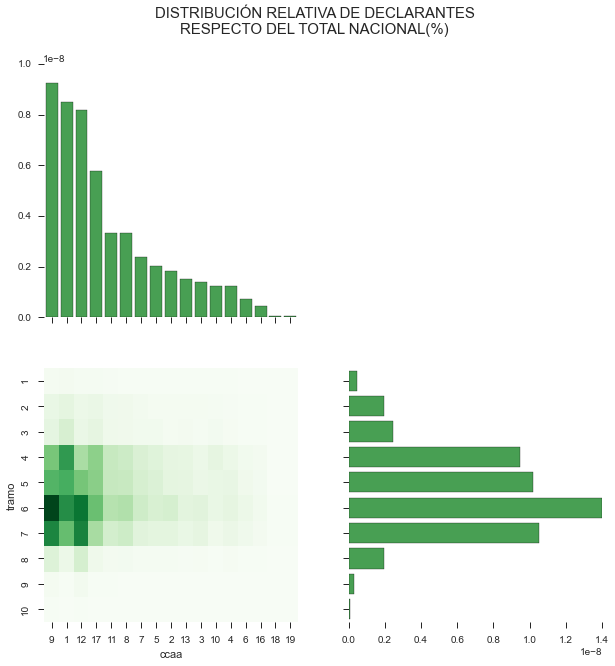

In [17]:
# distribucion de declarantes por tramo y ccaa

dist = data.pivot_table(index='tramo',                     # Tramos en filas
                        columns='ccaa',                    # CCCAA en columnas 
                        values='factoroptimizado',         # Valores = factoroptimizado
                        aggfunc='sum')                     # Se representa la suma de valores

orden_ca = dist.sum().sort_values(ascending=False).index   # Ordenar de mayor a menor las CCAA
dist = dist[orden_ca]

N = dist.sum().sum()                                       # poblacion total
dist = dist / N                                            # frecuencia relativa
dist_t = dist.sum(0) / N                                   # frecuencia relativa de tramo
dist_ca = dist.sum(1) / N                                  # frecuencia relativa de ccaa

# GRAFICO

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,3)
ax3 = plt.subplot(2,2,4)
ax2 = plt.subplot(2,2,1)

sns.heatmap(dist, ax=ax1, cbar=False, cmap='Greens')

g2 = sns.barplot(x=dist_t.index, y=dist_t.values, ax=ax2, color=sns.xkcd_rgb["medium green"]).set_xticklabels('')
g3 = sns.barplot(x=dist_ca, y=dist.index, ax=ax3, orient='horizontal', color=sns.xkcd_rgb["medium green"]).set_yticklabels('')

sns.despine(ax=ax2, left=True, bottom=True)
sns.despine(ax=ax3, left=True, bottom=True)
ax2.set_xlabel('')
ax3.set_ylabel('')
plt.suptitle('DISTRIBUCIÓN RELATIVA DE DECLARANTES \nRESPECTO DEL TOTAL NACIONAL(%)', fontsize=15)

In [18]:
percentil_90 = data['ingresostrabajo'].quantile(0.9)
d = data[data.ingresostrabajo <= percentil_90]

data_p90 = pd.pivot_table(d, values='factoroptimizado', index='tramo', columns='ccaa', aggfunc='sum')
data_p90.head()

ccaa,1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19
tramo,,,,,,,,,,,,,,,,,
1,31843.520617,5292.624574,5253,5777.000000,5863.156323,2806.000000,8165.170861,10982.000000,27244.560442,4334.280047,14196.199336,20936.570351,4733.904301,1343,21037.922984,109,122
2,137688.000000,26949.000000,25316,14415.000000,25940.000000,10977.000000,40743.595238,54732.000000,106046.000001,21973.123595,58694.000000,85484.626886,25461.000000,6863,99047.000001,576,713
3,200387.326003,28524.000000,23277,19948.000000,43329.000000,11843.000000,48540.000000,56911.738419,132839.000000,34624.000000,66863.000000,97696.000000,32378.115278,7521,126365.999999,782,978
4,740227.385536,126586.999999,86562,83066.000000,161486.000000,45813.999999,187593.999999,244760.999999,523447.575986,127462.000001,270721.000001,371142.000001,123727.020692,30375,461118.999998,3060,3323
5,653134.848522,136518.999999,92876,109514.000001,176931.604833,55239.000000,204723.999999,264916.833171,618361.326452,105883.000000,273097.000001,529447.177405,125492.000000,34489,469138.054751,3647,3641


/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


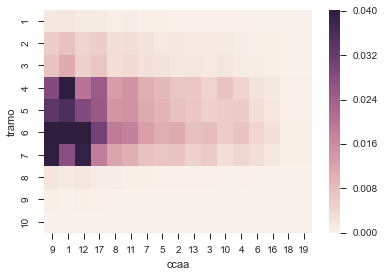

In [19]:
total = data_p90.sum().sum()
orden_ca = data_p90.sum().sort_values(ascending=False).index
data_p90 = data_p90[orden_ca]/total
sns.heatmap(data_p90, robust=True)

In [53]:
INFO

,descripcion
variables,
c455,BASE IMPONIBLE GENERAL (450 ­ 451 + 452 ­ 453 ­ 454)
c620,BASE LIQUIDABLE GENERAL SOMETIDA A GRAVAMEN. (618 ­ 619)
c689,APLICACIÓN DE LAS ESCALAS DEL IMPUESTO AL IMPORTE DE LA CASILLA 620 (Parte Estatal).
c690,APLICACIÓN DE LAS ESCALAS DEL IMPUESTO AL IMPORTE DE LA CASILLA 620 (Parte Autonómica)
c698,CUOTAS INTEGRAS (693 + 696) (Parte Estatal)
c699,CUOTAS INTEGRAS (694 + 697) (Parte Autonómica)
c730,CUOTAS LIQUIDAS INCREMENTADAS ( 720 + 722 + 723 + 724 + 725 ) (Parte Estatal).
c731,CUOTAS LIQUIDAS INCREMENTADAS ( 721 + 726 + 727 + 728 + 729 ) (Parte Autonómica).
categoriadecla,Variable creada para recoger las posibles combinaciones del tipo de tributación y el estado civil.


In [54]:
# PERCENTIL 10%
# TODO: DATOS POBLACIONALES

variables = ['factoroptimizado', 'c730']
percentil_10 = data[variables].copy()

percentil_10 = percentil_10.sort_values(by=variables[1], ascending=True)
percentil_10 = percentil_10.reset_index(drop=True)
percentil_10[variables[1]] = percentil_10.product(axis=1)
percentil_10[variables] = percentil_10[variables].cumsum(axis=0) / percentil_10.sum()

percentil_10.head()

,factoroptimizado,c730
0,0.000001,0
1,0.000004,0
2,0.000007,0
3,0.000008,0
4,0.000011,0


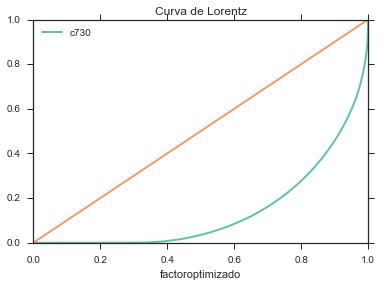

In [55]:
percentil_10.plot(kind='line', x=variables[0], y=variables[1], linewidth=2)
plt.plot([0,1])
plt.title('Curva de Lorentz')

In [56]:
# indice de gini
area_total = 0.5
area_bajo = si.trapz(x=percentil_10[variables[0]], y=percentil_10[variables[1]])
area_entre = area_total - area_bajo
gini = area_entre / area_total

In [57]:
gini

0.72068315883003664

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


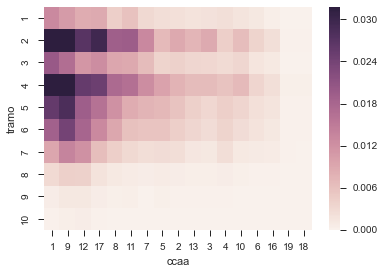

In [37]:
d = data[data.ingresostrabajo <= percentil_10]

data_p10 = pd.pivot_table(d, values='factoroptimizado', index='tramo', columns='ccaa', aggfunc='sum')
data_p10.head()

total = data_p10.sum().sum()
orden_ca = data_p10.sum().sort_values(ascending=False).index
data_p10 = data_p10[orden_ca]/total
sns.heatmap(data_p10, robust=True)

In [16]:
pd.DataFrame.quantile()

,descripcion
variables,
c455,BASE IMPONIBLE GENERAL (450 ­ 451 + 452 ­ 453 ­ 454)
c620,BASE LIQUIDABLE GENERAL SOMETIDA A GRAVAMEN. (618 ­ 619)
c689,APLICACIÓN DE LAS ESCALAS DEL IMPUESTO AL IMPORTE DE LA CASILLA 620 (Parte Estatal).
c690,APLICACIÓN DE LAS ESCALAS DEL IMPUESTO AL IMPORTE DE LA CASILLA 620 (Parte Autonómica)
c698,CUOTAS INTEGRAS (693 + 696) (Parte Estatal)
c699,CUOTAS INTEGRAS (694 + 697) (Parte Autonómica)
c730,CUOTAS LIQUIDAS INCREMENTADAS ( 720 + 722 + 723 + 724 + 725 ) (Parte Estatal).
c731,CUOTAS LIQUIDAS INCREMENTADAS ( 721 + 726 + 727 + 728 + 729 ) (Parte Autonómica).
categoriadecla,Variable creada para recoger las posibles combinaciones del tipo de tributación y el estado civil.


In [50]:
packages.install("ineq")

NameError: name 'packages' is not defined

In [71]:
# MEDIA DE LOS INGRESOS DEL TRABAJO
np.average(data.ingresostrabajo, weights=data.factoroptimizado) / 100
data.pivot_table(index='tramo', 
                 columns='ccaa', 
                 values='ingresostrabajo', 
                 aggfunc='media_pond')

AttributeError: 'DataFrame' object has no attribute 'average'

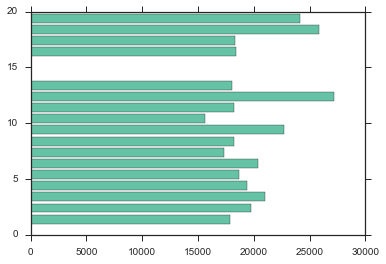

In [42]:
for ca, g in dist.groupby('ccaa'):
    plt.barh(ca, np.average(g.ingresostrabajo, weights=g.factoroptimizado)/100)
    plt.axvline(np.average(dist.ingresostrabajo, weights=dist.factoroptimizado) / 100, sum(dist.ingresostrabajo * dist.factoroptimizado) / dist.factoroptimizado.sum() / 100)